In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import spearmanr


In [11]:
MTLRS_rec_path ="/data/projects/utwente/recon/SKM-TEA_small/v1-release/predictions/MTLRS_SENSE/predictions_4x/Ensemble/2024-04-29_11-02-21/predictions/results_reconstruction_stacked_target:_False_.xlsx"
MTLRS_seg_path = "/data/projects/utwente/recon/SKM-TEA_small/v1-release/predictions/MTLRS_SENSE/predictions_4x/Ensemble/2024-04-29_11-02-21/predictions/results_segmentation.xlsx"

In [12]:
MTLRS_rec = pd.read_excel(MTLRS_rec_path,index_col=0,sheet_name="Echo 1")
MTLRS_seg = pd.read_excel(MTLRS_seg_path,index_col=0)

MTLRS = MTLRS_rec.merge(MTLRS_seg)
print(MTLRS)

   patiend_id      SSIM   HaarPSI       VSI       PSNR      DICE        F1  \
0     MTR_005  0.888995  0.859417  0.989205  32.676907  0.855564  0.502187   
1     MTR_006  0.879232  0.852394  0.988291  33.016802  0.797412  0.480254   
2     MTR_030  0.865212  0.818613  0.986837  32.153159  0.685252  0.397354   
3     MTR_034  0.894045  0.867662  0.989370  32.743364  0.831526  0.535251   
4     MTR_048  0.881431  0.862752  0.988204  32.290149  0.837332  0.574446   
5     MTR_052  0.816666  0.761667  0.981299  30.281904  0.542629  0.361841   
6     MTR_065  0.863011  0.827575  0.986099  31.375286  0.826582  0.564488   
7     MTR_066  0.891119  0.865523  0.990418  33.600725  0.746511  0.386381   
8     MTR_079  0.886693  0.832717  0.987025  32.097664  0.785412  0.481518   
9     MTR_080  0.901817  0.884859  0.990409  33.734414  0.843123  0.529480   
10    MTR_096  0.888285  0.881378  0.989398  32.739611  0.863713  0.594284   
11    MTR_099  0.881136  0.853864  0.987372  32.174877  0.845457

In [9]:
from IPython.display import display, HTML
display(MTLRS)

,patiend_id,SSIM,HaarPSI,VSI,PSNR,DICE,F1,HD95,IOU,ASD
0,MTR_005,0.888995,0.859417,0.989205,32.676907,0.855564,0.502187,5.489336,0.462635,0.205394
1,MTR_006,0.879232,0.852394,0.988291,33.016802,0.797412,0.480254,4.401576,0.380845,0.444562
2,MTR_030,0.865212,0.818613,0.986837,32.153159,0.685252,0.397354,6.617428,0.302860,0.602465
3,MTR_034,0.894045,0.867662,0.989370,32.743364,0.831526,0.535251,5.197853,0.456967,0.275038
4,MTR_048,0.881431,0.862752,0.988204,32.290149,0.837332,0.574446,6.142646,0.460073,0.360024
5,MTR_052,0.816666,0.761667,0.981299,30.281904,0.542629,0.361841,4.959527,0.198656,1.207878
6,MTR_065,0.863011,0.827575,0.986099,31.375286,0.826582,0.564488,5.801682,0.462637,0.307390
7,MTR_066,0.891119,0.865523,0.990418,33.600725,0.746511,0.386381,4.833985,0.314652,0.803295
8,MTR_079,0.886693,0.832717,0.987025,32.097664,0.785412,0.481518,4.376016,0.377942,0.701452
9,MTR_080,0.901817,0.884859,0.990409,33.734414,0.843123,0.529480,5.635657,0.443127,0.272627


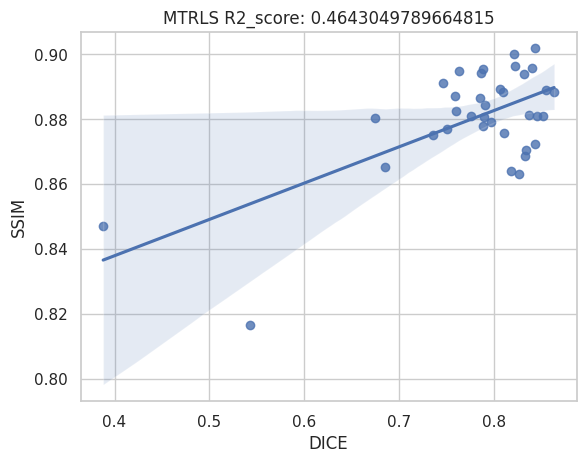

In [7]:
output = 'stacked'
sns.set_theme(style="whitegrid")
ax = sns.regplot(data=MTLRS,x='DICE',y='SSIM')
slope, intercept = np.polyfit(MTLRS.DICE,MTLRS.HaarPSI,1)
y_pred = intercept+ MTLRS.DICE*slope
score = r2_score(MTLRS.HaarPSI,y_pred)
plt.title(f"MTRLS R2_score: {score}")
plt.savefig('/scratch/tmpaquaij/Figures/Regression_plot_HaarPSI_gaussian2d_8x.png')

In [261]:
score = spearmanr(MTLRS.DICE,MTLRS.HaarPSI)
print(score)

SignificanceResult(statistic=0.2924066924066924, pvalue=0.08352789517705797)


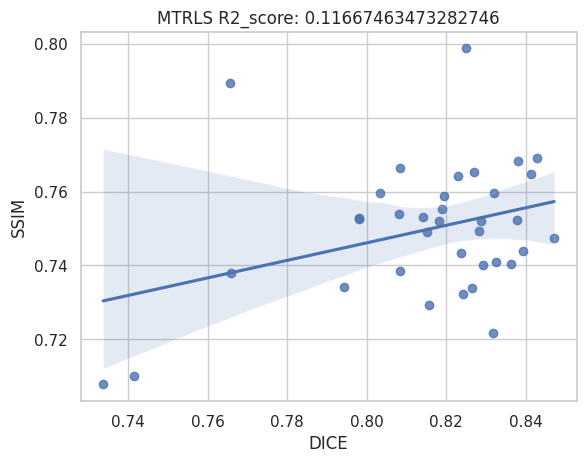

In [262]:
output = 'stacked'
sns.set_theme(style="whitegrid")
ax = sns.regplot(data=MTLRS,x='DICE',y='SSIM')
slope, intercept = np.polyfit(MTLRS.DICE,MTLRS.SSIM,1)
y_pred = intercept+ MTLRS.DICE*slope
score = r2_score(MTLRS.SSIM,y_pred)
plt.title(f"MTRLS R2_score: {score}")
plt.savefig('/scratch/tmpaquaij/Figures/Regression_plot_SSIM_gaussian2d_8x.png')

In [263]:
score = spearmanr(MTLRS.DICE,MTLRS.SSIM)
print(score)

SignificanceResult(statistic=0.17631917631917632, pvalue=0.30363642180538414)


In [264]:

CIRIM_rec.rename(columns={'MSE':'MSE_CIRIM','NMSE':'NMSE_CIRIM','PSNR':'PSNR_CIRIM','HaarPSI':'HaarPSI_CIRIM','VSI':'VSI_CIRIM','SSIM':'SSIM_CIRIM'},inplace=True)
MTLRS_rec.rename(columns={'MSE':'MSE_MTLRS','NMSE':'NMSE_MTLRS','PSNR':'PSNR_MTLRS','HaarPSI':'HaarPSI_MTLRS','VSI':'VSI_MTLRS','SSIM':'SSIM_MTLRS'},inplace=True)
rec_merg = CIRIM_rec.merge(MTLRS_rec)
selected_col = ['patiend_id', 'SSIM_MTLRS','SSIM_CIRIM','HaarPSI_MTLRS','HaarPSI_CIRIM']
data_poisson = rec_merg.loc[:,selected_col].head(11)
data_poisson.to_csv('/scratch/tmpaquaij/Figures/Gaussain_8x.csv')
print(data_poisson)


   patiend_id  SSIM_MTLRS  SSIM_CIRIM  HaarPSI_MTLRS  HaarPSI_CIRIM
0     MTR_005    0.759550    0.765962       0.675141       0.682415
1     MTR_006    0.752833    0.759862       0.672083       0.676574
2     MTR_030    0.749133    0.755032       0.667266       0.671551
3     MTR_034    0.764865    0.769786       0.669358       0.673072
4     MTR_048    0.721691    0.727620       0.658019       0.667417
5     MTR_052    0.707784    0.716328       0.610796       0.619302
6     MTR_065    0.733818    0.745101       0.640619       0.647613
7     MTR_066    0.798736    0.800865       0.716950       0.723200
8     MTR_079    0.752492    0.763126       0.652820       0.659148
9     MTR_080    0.769182    0.778472       0.680654       0.692522
10    MTR_096    0.752402    0.758044       0.690314       0.700319


In [265]:
CIRM_rec_path = "/scratch/tmpaquaij/Results/atommic/mltrs/trained_models/SKMTEA/CIRIM_sense/predictions_4x/2024-01-15_21-52-00/predictions/results_reconstruction_stacked_.csv"
MTLRS_rec_path ="/scratch/tmpaquaij/Results/atommic/mltrs/trained_models/SKMTEA/MTLRS_SENSE/predictions_4x/2024-01-15_17-43-55/predictions/results_reconstruction_stacked_.csv"
MTLRS_seg_path = "/scratch/tmpaquaij/Results/atommic/mltrs/trained_models/SKMTEA/MTLRS_SENSE/predictions_4x/2024-01-15_17-43-55/predictions/results_segmentation.csv"

In [266]:
MTLRS_rec = pd.read_csv(MTLRS_rec_path,index_col=0)
CIRIM_rec = pd.read_csv(CIRM_rec_path,index_col=0)
MTLRS_seg = pd.read_csv(MTLRS_seg_path,index_col=0)

MTLRS = MTLRS_rec.merge(MTLRS_seg)

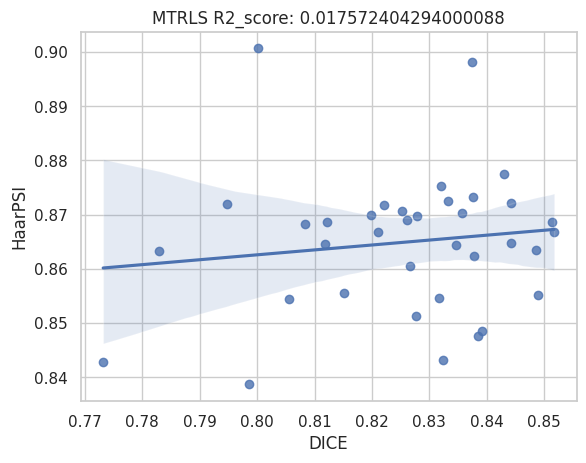

In [267]:
output = 'stacked'
sns.set_theme(style="whitegrid")
ax = sns.regplot(data=MTLRS,x='DICE',y='HaarPSI')
slope, intercept = np.polyfit(MTLRS.DICE,MTLRS.HaarPSI,1)
y_pred = intercept+ MTLRS.DICE*slope
score = r2_score(MTLRS.HaarPSI,y_pred)
plt.title(f"MTRLS R2_score: {score}")
plt.savefig('/scratch/tmpaquaij/Figures/Regression_plot_HaarPSI_poisson2d_4x.png')

In [268]:
score = spearmanr(MTLRS.DICE,MTLRS.HaarPSI)
print(score)

SignificanceResult(statistic=0.09832689832689835, pvalue=0.5683209387694999)


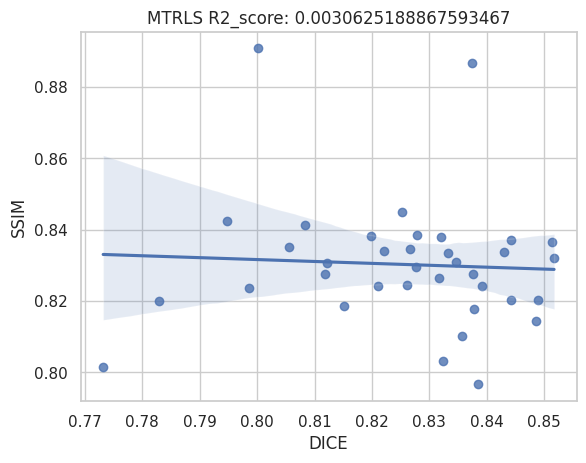

In [269]:
output = 'stacked'
sns.set_theme(style="whitegrid")
ax = sns.regplot(data=MTLRS,x='DICE',y='SSIM')
slope, intercept = np.polyfit(MTLRS.DICE,MTLRS.SSIM,1)
y_pred = intercept+ MTLRS.DICE*slope
score = r2_score(MTLRS.SSIM,y_pred)
plt.title(f"MTRLS R2_score: {score}")
plt.savefig('/scratch/tmpaquaij/Figures/Regression_plot_SSIM_poisson2d_4x.png')

In [270]:
score = spearmanr(MTLRS.DICE,MTLRS.SSIM)
print(score)

SignificanceResult(statistic=-0.14723294723294725, pvalue=0.39149742242481256)


In [271]:
CIRIM_rec.rename(columns={'MSE':'MSE_CIRIM','NMSE':'NMSE_CIRIM','PSNR':'PSNR_CIRIM','HaarPSI':'HaarPSI_CIRIM','VSI':'VSI_CIRIM','SSIM':'SSIM_CIRIM'},inplace=True)
MTLRS_rec.rename(columns={'MSE':'MSE_MTLRS','NMSE':'NMSE_MTLRS','PSNR':'PSNR_MTLRS','HaarPSI':'HaarPSI_MTLRS','VSI':'VSI_MTLRS','SSIM':'SSIM_MTLRS'},inplace=True)
rec_merg = CIRIM_rec.merge(MTLRS_rec)
selected_col = ['patiend_id', 'SSIM_MTLRS','SSIM_CIRIM','HaarPSI_MTLRS','HaarPSI_CIRIM']
data_poisson = rec_merg.loc[:,selected_col].head(11)
print(data_poisson)
data_poisson.to_csv('/scratch/tmpaquaij/Figures/Poisson2d_4x.csv')

   patiend_id  SSIM_MTLRS  SSIM_CIRIM  HaarPSI_MTLRS  HaarPSI_CIRIM
0     MTR_005    0.833986    0.836825       0.871828       0.881485
1     MTR_006    0.834404    0.835672       0.860449       0.868280
2     MTR_030    0.831998    0.835030       0.866888       0.877091
3     MTR_034    0.833615    0.834869       0.877432       0.885424
4     MTR_048    0.803078    0.805849       0.843114       0.853670
5     MTR_052    0.823573    0.826934       0.838679       0.847151
6     MTR_065    0.824138    0.826780       0.848463       0.858282
7     MTR_066    0.886628    0.889881       0.898068       0.907193
8     MTR_079    0.826353    0.829664       0.854559       0.863792
9     MTR_080    0.827563    0.829854       0.873283       0.885261
10    MTR_096    0.810002    0.809889       0.870348       0.877675
